[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

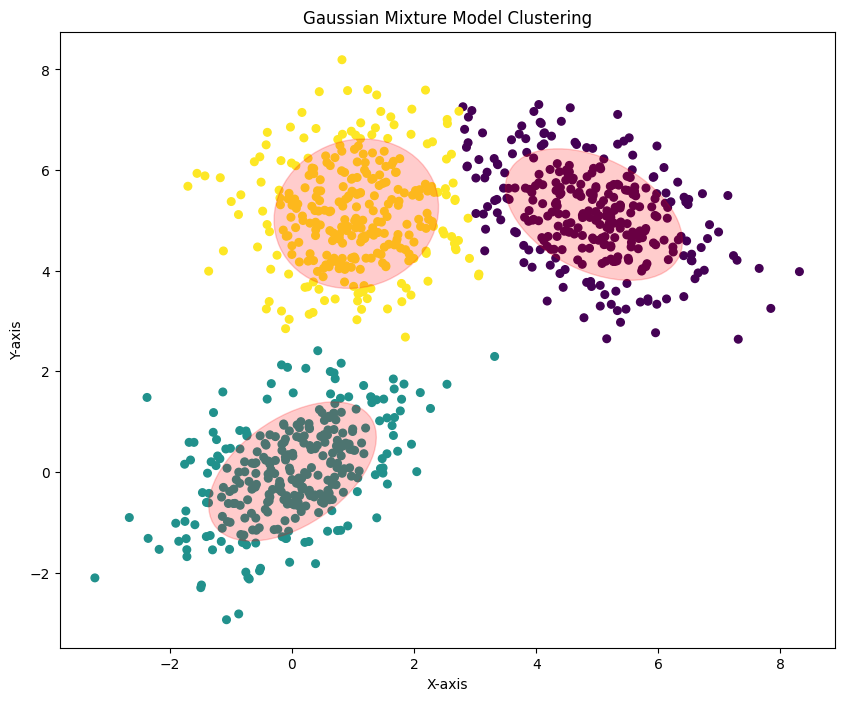

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from matplotlib.patches import Ellipse  # Import Ellipse directly
# Set random seed for reproducibility
np.random.seed(42)
# Generate sample data
# Cluster 1
mean1 = [0, 0]
cov1 = [[1, 0.5], [0.5, 1]]  # Covariance matrix
data1 = np.random.multivariate_normal(mean1, cov1, 300)
# Cluster 2
mean2 = [5, 5]
cov2 = [[1, -0.5], [-0.5, 1]]
data2 = np.random.multivariate_normal(mean2, cov2, 300)
# Cluster 3
mean3 = [1, 5]
cov3 = [[1, 0], [0, 1]]
data3 = np.random.multivariate_normal(mean3, cov3, 300)
# Combine data into one array
data = np.vstack((data1, data2, data3))
# Fit the GMM model
gmm = GaussianMixture(n_components=3, covariance_type='full')
gmm.fit(data)
# Predict cluster memberships
labels = gmm.predict(data)

print(labels)

# Plotting
plt.figure(figsize=(10, 8))
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', s=30)
plt.title('Gaussian Mixture Model Clustering')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
# Draw covariance ellipses for each cluster
def draw_ellipse(ax, mean, cov, color):
    v, w = np.linalg.eigh(cov)
    v = 2.0 * np.sqrt(2.0) * np.sqrt(v)  # Scale the ellipse
    u = w[0] / np.linalg.norm(w[0])
    angle = np.arctan(u[1] / u[0])
    angle = 180.0 * angle / np.pi  # Convert to degrees
    ell = Ellipse(mean, v[0], v[1], angle=angle, color=color, alpha=0.2)  # Corrected here
    ax.add_patch(ell)
for i in range(gmm.n_components):
    draw_ellipse(plt.gca(), gmm.means_[i], gmm.covariances_[i], 'red')
plt.show()

[0 1 1 1 0 1 1 0 1 0 1 0 1 1 1 1 0 1 1 0 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 1
 1 1 1 0 0 0 1 0 0 1 1 0 1 0 1 0 1 1 1 1 1 0 1 0 1 0 0 1 1 1 1 1 0 0 0 1 1
 0 0 1 1 0 0 1 1 0 1 0 0 1 1 1 0 0 0 0 0 1 0 1 0 1 1 1 0 1 0 1 1 0 1 0 1 0
 1 1 1 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 1 1 1 0 1 0 1 0 0 1 0 1 0 1 0 1 1 1 0
 1 0 1 0 1 0 1 0 0 1 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1
 0 0 0 1 1 1 1 1 0 0 0 0 0 1 1 1 0 1 0 1 1 0 1 0 1 0 0 1 1 1 0 1 0 1 1 0 1
 1 1 1 1 0 0 1 0 0 1 0 0 1 1 0 1 0 0 1 0 0 1 0 0 0 0 1 0 0 1 1 1 0 0 0 1 1
 1 1 0 0 0 0 1 1 0 1 0 0 0 1 0 0 1 0 1 0 1 1 1 0 0 0 1 0 0 0 1 1 1 0 0 0 0
 1 0 1 0 0 0 0 0 1 1 0 1 1 0 1 0 1 1 0 0 0 0 1 0 1 0 0 1 1 0 0 0 1 0 1 0 1
 1 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 1
 0 1 0 0 1 1 0 0 1 1 0 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 0 0 1 1 1 0 0 0 1 1 1
 0 1 0 0 1 1 0 1 1 1 1 0 0 1 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 1 1 0 1 1 1
 0 1 1 0 1 1 1 1 0 0 0 1 1 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 1 1 1 1 1
 0 1 0 0 1 1 0 0 0 1 1 1 

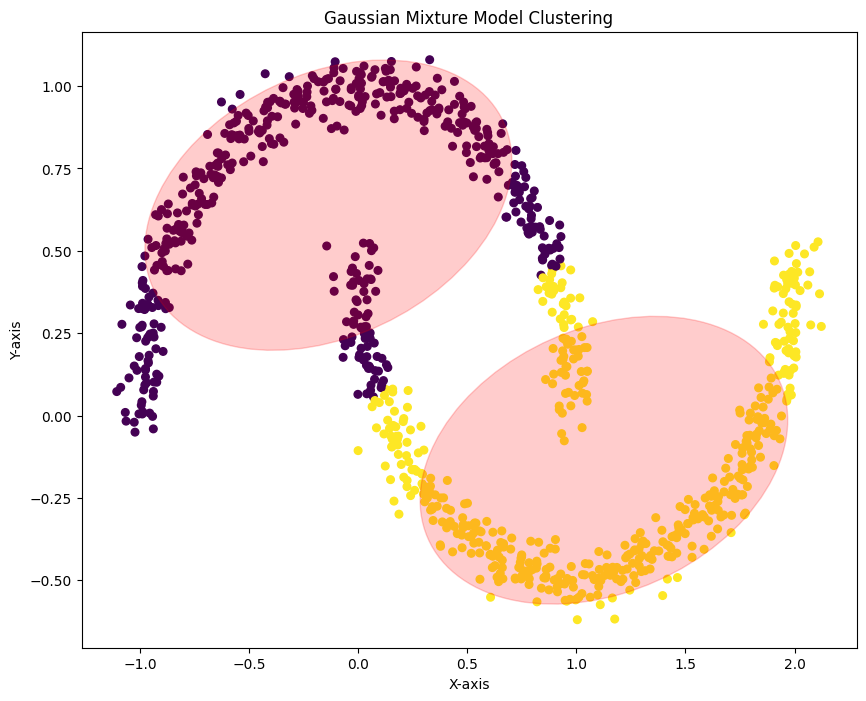

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
from sklearn.mixture import GaussianMixture
from matplotlib.patches import Ellipse  # Import Ellipse directly
# Set random seed for reproducibility
np.random.seed(42)
# Generate sample data
# Cluster 1
data,y=make_moons(n_samples=1000, noise=0.05)


gmm = GaussianMixture(n_components=2, covariance_type='full')
gmm.fit(data)
# Predict cluster memberships
labels = gmm.predict(data)

print(labels)

# Plotting
plt.figure(figsize=(10, 8))
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', s=30)
plt.title('Gaussian Mixture Model Clustering')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
# Draw covariance ellipses for each cluster
def draw_ellipse(ax, mean, cov, color):
    v, w = np.linalg.eigh(cov)
    v = 2.0 * np.sqrt(2.0) * np.sqrt(v)  # Scale the ellipse
    u = w[0] / np.linalg.norm(w[0])
    angle = np.arctan(u[1] / u[0])
    angle = 180.0 * angle / np.pi  # Convert to degrees
    ell = Ellipse(mean, v[0], v[1], angle=angle, color=color, alpha=0.2)  # Corrected here
    ax.add_patch(ell)
for i in range(gmm.n_components):
    draw_ellipse(plt.gca(), gmm.means_[i], gmm.covariances_[i], 'red')
plt.show()

In [4]:
from sklearn.mixture import BayesianGaussianMixture, GaussianMixture
bgm=BayesianGaussianMixture(n_components=10,n_init=10,random_state=42)
bgm.fit(data)
print(bgm.weights_.round(2))

significant_components = bgm.weights_ > 0.01  # lub inny próg
num_significant_components = np.sum(significant_components)
print(f"Liczba znaczących skupień: {num_significant_components}")

[0.07 0.15 0.13 0.12 0.14 0.16 0.   0.11 0.11 0.  ]
Liczba znaczących skupień: 8


c:\Python311\Lib\site-packages\sklearn\mixture\_base.py:269: ConvergenceWarning: Best performing initialization did not converge. Try different init parameters, or increase max_iter, tol, or check for degenerate data.
  warnings.warn(


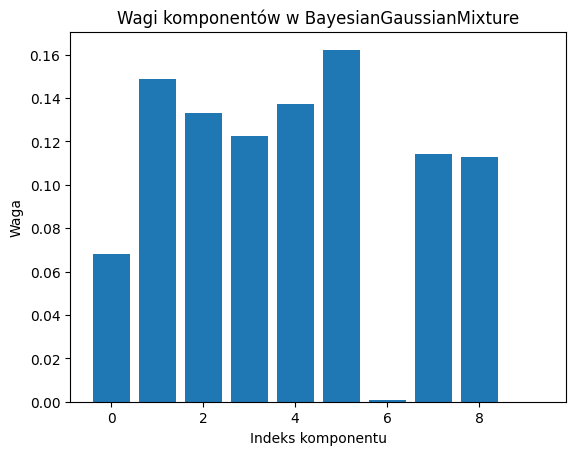

In [5]:
   import matplotlib.pyplot as plt
   plt.bar(range(len(bgm.weights_)), bgm.weights_)
   plt.xlabel('Indeks komponentu')
   plt.ylabel('Waga')
   plt.title('Wagi komponentów w BayesianGaussianMixture')
   plt.show()